$$\Large \text {How to Develop LSTM Models for Time Series Forecasting} $$

$\large ✔︎ $Univariate LSTM Models   
$\large ✔︎ $Multivariate LSTM Models   
$\large ✔︎ $Multi-Step LSTM Models   
$\large ✔︎ $Multivariate Multi-Step LSTM Models   

# Univariate LSTM Models

## Number of variations of the LSTM model for univariate time series forecasting.

$\large 1. $Data Preparation   
$\large 2. $Vanilla LSTM   
$\large 3. $Stacked LSTM   
$\large 4. $Bidirectional LSTM   
$\large 5. $CNN LSTM   
$\large 6. $ConvLSTM   

### Data Preparation

## Univariate data preparation

### Split sequence by steps

Example:

**sequence:** [10, 20, 30, 40, 50, 60, 70, 80, 90]   
**split:**    
>    [10 20 30] 40   
    [20 30 40] 50   
    [30 40 50] 60   
    [40 50 60] 70   
    [50 60 70] 80   
    [60 70 80] 90   


### Define split function

In [86]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Define input sequence

In [87]:
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80]

### Choose a number of time steps

In [88]:
n_steps = 3

### Split into samples

In [89]:
X, y = split_sequence(raw_seq, n_steps)

### Summarize the data

In [90]:
print(X)
print(y)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]]
[40 50 60 70 80]


In [29]:
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80


### Maping to sentense

[10 20 30] -> sentense

10, 20, 30: word with 1 feature

## Vanilla LSTM

### Import libs

In [91]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

### Define model

In [97]:
def create_vanilla_lstm(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

 # $\Large ❆ $ Reshape from [samples, timesteps] into [samples, timesteps, features]  $\Large ❆$ 

In [94]:
print(X.shape)

(5, 3)


In [95]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [96]:
print(X.shape)
print(X)

(5, 3, 1)
[[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]

 [[50]
  [60]
  [70]]]


### Create model instance

In [98]:
model = create_vanilla_lstm(n_steps, n_features)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


### Fit model

In [99]:
history = model.fit(X, y, epochs=200, verbose=1 )

Epoch 1/200
5/5 [==============================] - 1s 271ms/sample - loss: 2799.1990
Epoch 2/200
5/5 [==============================] - 0s 3ms/sample - loss: 2716.3843
Epoch 3/200
5/5 [==============================] - 0s 3ms/sample - loss: 2634.8994
Epoch 4/200
5/5 [==============================] - 0s 4ms/sample - loss: 2556.0464
Epoch 5/200
5/5 [==============================] - 0s 3ms/sample - loss: 2478.0847
Epoch 6/200
5/5 [==============================] - 0s 3ms/sample - loss: 2400.2397
Epoch 7/200
5/5 [==============================] - 0s 3ms/sample - loss: 2320.8459
Epoch 8/200
5/5 [==============================] - 0s 3ms/sample - loss: 2240.4185
Epoch 9/200
5/5 [==============================] - 0s 3ms/sample - loss: 2159.1372
Epoch 10/200
5/5 [==============================] - 0s 3ms/sample - loss: 2077.6616
Epoch 11/200
5/5 [==============================] - 0s 3ms/sample - loss: 1995.9528
Epoch 12/200
5/5 [==============================] - 0s 3ms/sample - loss: 1913.0188

Epoch 101/200
5/5 [==============================] - 0s 3ms/sample - loss: 3.6187
Epoch 102/200
5/5 [==============================] - 0s 3ms/sample - loss: 3.3628
Epoch 103/200
5/5 [==============================] - 0s 3ms/sample - loss: 3.1935
Epoch 104/200
5/5 [==============================] - 0s 3ms/sample - loss: 3.0149
Epoch 105/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.8220
Epoch 106/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.6293
Epoch 107/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.4849
Epoch 108/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.3381
Epoch 109/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.1914
Epoch 110/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.0509
Epoch 111/200
5/5 [==============================] - 0s 3ms/sample - loss: 1.9034
Epoch 112/200
5/5 [==============================] - 0s 3ms/sample - loss: 1.7509
Epoch 113/200
5/

Epoch 200/200
5/5 [==============================] - 0s 3ms/sample - loss: 1.1161e-05


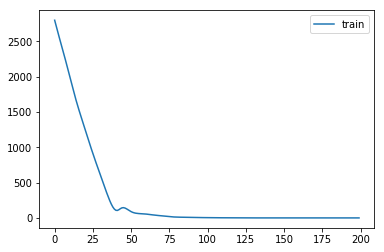

In [100]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Demonstrate prediction

In [121]:
x_input = array([ 49, 61, 70])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

### Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

In [123]:
# define model
def create_staked_lstm(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

In [124]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
model = create_staked_lstm(n_steps, n_features)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [125]:
# fit model
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
5/5 [==============================] - 2s 441ms/sample - loss: 3817.8970
Epoch 2/200
5/5 [==============================] - 0s 6ms/sample - loss: 3801.7446
Epoch 3/200
5/5 [==============================] - 0s 6ms/sample - loss: 3784.7422
Epoch 4/200
5/5 [==============================] - 0s 6ms/sample - loss: 3767.0317
Epoch 5/200
5/5 [==============================] - 0s 6ms/sample - loss: 3748.9817
Epoch 6/200
5/5 [==============================] - 0s 5ms/sample - loss: 3729.7886
Epoch 7/200
5/5 [==============================] - 0s 5ms/sample - loss: 3709.0090
Epoch 8/200
5/5 [==============================] - 0s 5ms/sample - loss: 3686.7136
Epoch 9/200
5/5 [==============================] - 0s 6ms/sample - loss: 3662.6445
Epoch 10/200
5/5 [==============================] - 0s 6ms/sample - loss: 3636.5632
Epoch 11/200
5/5 [==============================] - 0s 6ms/sample - loss: 3608.5103
Epoch 12/200
5/5 [==============================] - 0s 6ms/sample - loss: 3578.3516

5/5 [==============================] - 0s 6ms/sample - loss: 6.8654
Epoch 101/200
5/5 [==============================] - 0s 6ms/sample - loss: 6.5526
Epoch 102/200
5/5 [==============================] - 0s 6ms/sample - loss: 6.1860
Epoch 103/200
5/5 [==============================] - 0s 5ms/sample - loss: 5.8093
Epoch 104/200
5/5 [==============================] - 0s 6ms/sample - loss: 5.4818
Epoch 105/200
5/5 [==============================] - 0s 6ms/sample - loss: 5.2227
Epoch 106/200
5/5 [==============================] - 0s 6ms/sample - loss: 5.0049
Epoch 107/200
5/5 [==============================] - 0s 5ms/sample - loss: 4.8039
Epoch 108/200
5/5 [==============================] - 0s 6ms/sample - loss: 4.5940
Epoch 109/200
5/5 [==============================] - 0s 6ms/sample - loss: 4.3565
Epoch 110/200
5/5 [==============================] - 0s 5ms/sample - loss: 4.0987
Epoch 111/200
5/5 [==============================] - 0s 6ms/sample - loss: 3.8297
Epoch 112/200
5/5 [===========

5/5 [==============================] - 0s 5ms/sample - loss: 0.1048


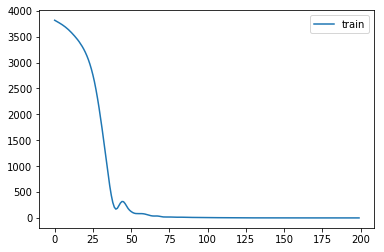

In [126]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [131]:
# demonstrate prediction
x_input = array([80, 90, 100])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [132]:
yhat

array([[127.93962]], dtype=float32)

## Multivariate LSTM Models


There are two main models that we may require with multivariate time series data; they are:

* Multiple Input Series.
* Multiple Parallel Series.

### Multiple Input Series

In [133]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [134]:
out_seq

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [135]:
# convert to [rows, columns] structure
import numpy as np
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = np.hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

## Split a multivariate sequence into samples

In [136]:
def split_multivariate_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [138]:
print(X)
print(y)

[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]

 [[70 75]
  [80 85]
  [90 95]]]
[ 65  85 105 125 145 165 185]


In [137]:
n_steps = 3
# convert into input/output
X, y = split_multivariate_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [75]:
X.shape[2]

2

### define model

In [139]:
def create_multiple_input_series_lstm(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model


### create model

In [140]:
n_features = X.shape[2]
model = create_multiple_input_series_lstm(n_steps, n_features)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 50)                10600     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


### fit model

In [141]:
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 251ms/sample - loss: 17780.7637
Epoch 2/200
7/7 [==============================] - 0s 3ms/sample - loss: 17618.5195
Epoch 3/200
7/7 [==============================] - 0s 2ms/sample - loss: 17463.8340
Epoch 4/200
7/7 [==============================] - 0s 3ms/sample - loss: 17314.7676
Epoch 5/200
7/7 [==============================] - 0s 3ms/sample - loss: 17174.6348
Epoch 6/200
7/7 [==============================] - 0s 2ms/sample - loss: 17042.8320
Epoch 7/200
7/7 [==============================] - 0s 2ms/sample - loss: 16915.3125
Epoch 8/200
7/7 [==============================] - 0s 2ms/sample - loss: 16791.2617
Epoch 9/200
7/7 [==============================] - 0s 3ms/sample - loss: 16674.6504
Epoch 10/200
7/7 [==============================] - 0s 2ms/sample - loss: 16556.2520
Epoch 11/200
7/7 [==============================] - 0s 3ms/sample - loss: 16432.0410
Epoch 12/200
7/7 [==============================] - 0s 3ms/sample - loss

7/7 [==============================] - 0s 2ms/sample - loss: 27.6108
Epoch 100/200
7/7 [==============================] - 0s 2ms/sample - loss: 26.4698
Epoch 101/200
7/7 [==============================] - 0s 3ms/sample - loss: 25.4451
Epoch 102/200
7/7 [==============================] - 0s 3ms/sample - loss: 24.5612
Epoch 103/200
7/7 [==============================] - 0s 2ms/sample - loss: 23.8345
Epoch 104/200
7/7 [==============================] - 0s 2ms/sample - loss: 23.3311
Epoch 105/200
7/7 [==============================] - 0s 2ms/sample - loss: 23.0764
Epoch 106/200
7/7 [==============================] - 0s 3ms/sample - loss: 22.8674
Epoch 107/200
7/7 [==============================] - 0s 2ms/sample - loss: 22.7821
Epoch 108/200
7/7 [==============================] - 0s 3ms/sample - loss: 22.8299
Epoch 109/200
7/7 [==============================] - 0s 2ms/sample - loss: 22.5130
Epoch 110/200
7/7 [==============================] - 0s 2ms/sample - loss: 21.8552
Epoch 111/200
7/7 

Epoch 199/200
7/7 [==============================] - 0s 2ms/sample - loss: 0.6490
Epoch 200/200
7/7 [==============================] - 0s 2ms/sample - loss: 0.6008


### demonstrate prediction

In [144]:
x_input = array([[90, 95], [100, 105], [110, 115]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)

1/1 [==============================] - 0s 8ms/sample


In [145]:
yhat

array([[230.01543]], dtype=float32)

## Multiple Parallel Series

An alternate time series problem is the case where there are multiple parallel time series and a value must be predicted for each.


### split a multivariate sequence into samples

In [81]:
def split_multiple_parallel_series(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [155]:
n_steps = 5
# convert into input/output
X, y = split_multiple_parallel_series(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(4, 5, 3) (4, 3)
[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


### define model

In [156]:
def create_multiple_parallel_series_lstm(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

### fit model

In [157]:
n_features = X.shape[2]
model = create_multiple_parallel_series_lstm(n_steps, n_features)
model.fit(X, y, epochs=400, verbose=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 5, 100)            41600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 303       
Total params: 122,303
Trainable params: 122,303
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
4/4 [==============================] - 3s 749ms/sample - loss: 12051.9043
Epoch 2/400
4/4 [==============================] - 0s 7ms/sample - loss: 11773.8066
Epoch 3/400
4/4 [==============================] - 0s 8ms/sample - loss: 11507.2051
Epoch 4/400
4/4 [==============================] - 0s 9ms/sample - loss: 11239.8809
Epoch 5/400
4/4 [======================

Epoch 92/400
4/4 [==============================] - 0s 10ms/sample - loss: 0.0342
Epoch 93/400
4/4 [==============================] - 0s 9ms/sample - loss: 0.0323
Epoch 94/400
4/4 [==============================] - 0s 8ms/sample - loss: 0.0371
Epoch 95/400
4/4 [==============================] - 0s 8ms/sample - loss: 0.0389
Epoch 96/400
4/4 [==============================] - 0s 9ms/sample - loss: 0.0439
Epoch 97/400
4/4 [==============================] - 0s 10ms/sample - loss: 0.0375
Epoch 98/400
4/4 [==============================] - 0s 9ms/sample - loss: 0.0325
Epoch 99/400
4/4 [==============================] - 0s 10ms/sample - loss: 0.0244
Epoch 100/400
4/4 [==============================] - 0s 9ms/sample - loss: 0.0204
Epoch 101/400
4/4 [==============================] - 0s 8ms/sample - loss: 0.0138
Epoch 102/400
4/4 [==============================] - 0s 9ms/sample - loss: 0.0124
Epoch 103/400
4/4 [==============================] - 0s 9ms/sample - loss: 0.0124
Epoch 104/400
4/4 [==

Epoch 189/400
4/4 [==============================] - 0s 10ms/sample - loss: 1.4068e-05
Epoch 190/400
4/4 [==============================] - 0s 8ms/sample - loss: 1.3307e-05
Epoch 191/400
4/4 [==============================] - 0s 9ms/sample - loss: 1.2084e-05
Epoch 192/400
4/4 [==============================] - 0s 9ms/sample - loss: 1.1449e-05
Epoch 193/400
4/4 [==============================] - 0s 8ms/sample - loss: 1.0925e-05
Epoch 194/400
4/4 [==============================] - 0s 10ms/sample - loss: 1.0697e-05
Epoch 195/400
4/4 [==============================] - 0s 8ms/sample - loss: 1.0708e-05
Epoch 196/400
4/4 [==============================] - 0s 8ms/sample - loss: 1.0109e-05
Epoch 197/400
4/4 [==============================] - 0s 8ms/sample - loss: 9.7419e-06
Epoch 198/400
4/4 [==============================] - 0s 10ms/sample - loss: 9.3178e-06
Epoch 199/400
4/4 [==============================] - 0s 8ms/sample - loss: 8.9414e-06
Epoch 200/400
4/4 [==============================] 

Epoch 284/400
4/4 [==============================] - 0s 8ms/sample - loss: 4.0503e-07
Epoch 285/400
4/4 [==============================] - 0s 10ms/sample - loss: 3.8954e-07
Epoch 286/400
4/4 [==============================] - 0s 9ms/sample - loss: 3.7464e-07
Epoch 287/400
4/4 [==============================] - 0s 9ms/sample - loss: 3.5722e-07
Epoch 288/400
4/4 [==============================] - 0s 10ms/sample - loss: 3.3876e-07
Epoch 289/400
4/4 [==============================] - 0s 8ms/sample - loss: 3.2828e-07
Epoch 290/400
4/4 [==============================] - 0s 8ms/sample - loss: 3.1481e-07
Epoch 291/400
4/4 [==============================] - 0s 9ms/sample - loss: 3.0275e-07
Epoch 292/400
4/4 [==============================] - 0s 10ms/sample - loss: 2.9428e-07
Epoch 293/400
4/4 [==============================] - 0s 10ms/sample - loss: 2.8320e-07
Epoch 294/400
4/4 [==============================] - 0s 8ms/sample - loss: 2.7472e-07
Epoch 295/400
4/4 [==============================]

Epoch 379/400
4/4 [==============================] - 0s 8ms/sample - loss: 7.9890e-09
Epoch 380/400
4/4 [==============================] - 0s 9ms/sample - loss: 9.4587e-09
Epoch 381/400
4/4 [==============================] - 0s 10ms/sample - loss: 9.6006e-09
Epoch 382/400
4/4 [==============================] - 0s 8ms/sample - loss: 7.0965e-09
Epoch 383/400
4/4 [==============================] - 0s 9ms/sample - loss: 5.9178e-09
Epoch 384/400
4/4 [==============================] - 0s 10ms/sample - loss: 5.9954e-09
Epoch 385/400
4/4 [==============================] - 0s 9ms/sample - loss: 6.7921e-09
Epoch 386/400
4/4 [==============================] - 0s 10ms/sample - loss: 7.0928e-09
Epoch 387/400
4/4 [==============================] - 0s 9ms/sample - loss: 5.8511e-09
Epoch 388/400
4/4 [==============================] - 0s 9ms/sample - loss: 5.3272e-09
Epoch 389/400
4/4 [==============================] - 0s 10ms/sample - loss: 4.8616e-09
Epoch 390/400
4/4 [==============================]

### demonstrate prediction

In [158]:
x_input = array([[50, 55, 105],[60, 65, 125],[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.7391  109.54726 214.67247]]
